In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [3]:
raw=pd.read_csv("tr_eikon_eod_data.csv",index_col=0,parse_dates=True)

In [4]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [5]:
symbol='AAPL.O'
data=pd.DataFrame(raw[symbol]).dropna()

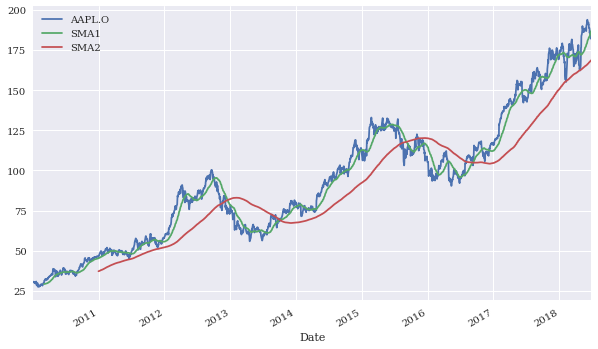

In [6]:
sma1=42
sma2=252
data['SMA1']=data[symbol].rolling(sma1).mean()
data['SMA2']=data[symbol].rolling(sma2).mean()
data.plot(figsize=(10,6))

In [8]:
data.dropna(inplace=True)

In [10]:
data['position']=np.where(data['SMA1']>data['SMA2'],1,-1)

In [11]:
data.tail()

,AAPL.O,SMA1,SMA2,position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


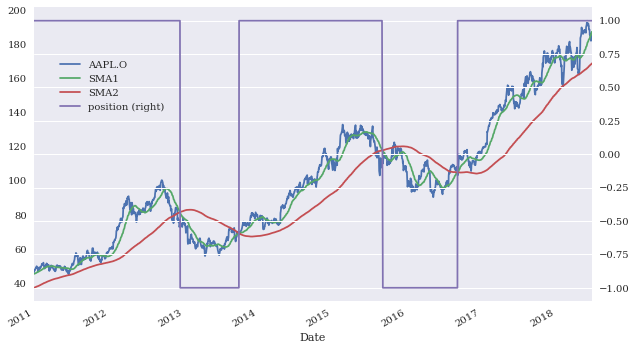

In [16]:
ax=data.plot(secondary_y='position',figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [17]:
#backtesting

In [19]:
data['returns']=np.log(data[symbol]/data[symbol].shift(1))


In [22]:
data['strat']=data['position'].shift(1)*data['returns']

In [24]:
data.dropna(inplace=True)

In [25]:
np.exp(data[['returns','strat']].sum())

returns    4.017148
strat      5.811299
dtype: float64

In [26]:
data[['returns','strat']].std()*252**0.5

returns    0.250571
strat      0.250407
dtype: float64

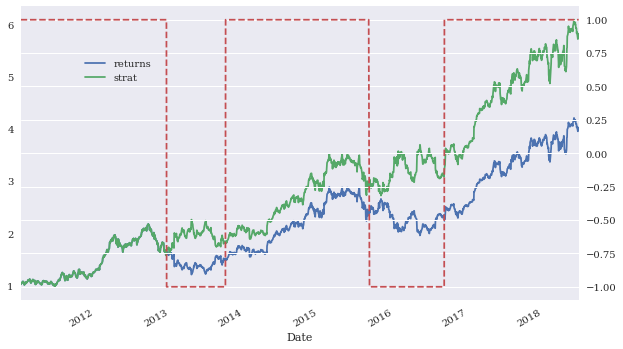

In [30]:
ax=data[['returns','strat']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['position'].plot(ax=ax,secondary_y='position',style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [31]:
#brutal force

In [40]:
from itertools import product
sma1=range(20,61,4)
sma2=range(180,281,10)
results=pd.DataFrame()
for SMA1,SMA2 in product(sma1,sma2):
    data=pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['returns']=np.log(data[symbol]/data[symbol].shift(1))
    data['SMA1']=data[symbol].rolling(SMA1).mean()
    data['SMA2']=data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['position']=np.where(data['SMA1']>data['SMA2'],1,-1)
    data['strat']=data['position'].shift(1)*data['returns']
    data.dropna(inplace=True)
    pref=np.exp(data[['returns','strat']].sum())
    results=results.append(pd.DataFrame(
                {'SMA1':SMA1,'SMA2':SMA2,'MKT':pref['returns'],
                'strat':pref['strat'],
                'OUT':pref['strat']-pref['returns']},index=[0]),ignore_index=True)

In [43]:
results.sort_values('OUT',ascending=False).head()

,SMA1,SMA2,MKT,strat,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010


In [4]:
#RW
symbol='.SPX'
data=pd.DataFrame(raw[symbol])

In [8]:
lags=5
cols=[]
for i in range(1,lags+1):
    col='lag_{}'.format(i)
    data[col]=data[symbol].shift(i)
    cols.append(col)

In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69
2010-01-15,1136.03,1148.46,1145.68,1136.22,1146.98,1144.98


In [12]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [5]:
symbol='EUR='
data=pd.DataFrame(raw[symbol])
data['returns']=np.log(data/data.shift(1))
data.dropna(inplace=True)

In [6]:
data['direction']=np.sign(data['returns']).astype(int)

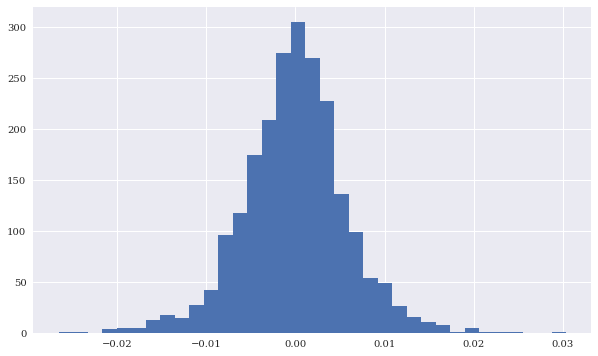

In [7]:
data.returns.hist(bins=35,figsize=(10,6))

In [8]:
lags=2
def create_lag(data):
    global cols_
    cols_=[]
    for lag in range(1,lags+1):
        col='lag_{}'.format(lag)
        data[col]=data['returns'].shift(lag)
        cols_.append(col)
create_lag(data)

In [9]:
data.head(6)

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-04,1.4411,0.006125,1,NaN,NaN
2010-01-05,1.4368,-0.002988,-1,0.006125,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [10]:
data.dropna(inplace=True)

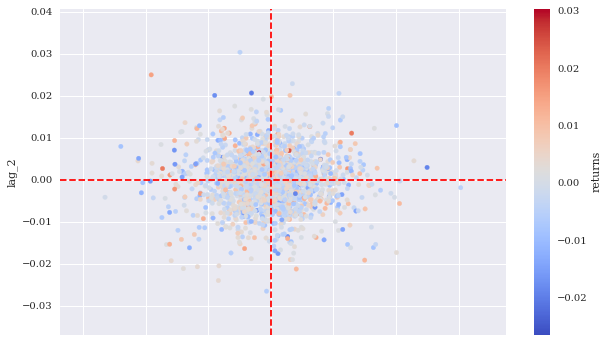

In [11]:
data.plot.scatter(x='lag_1',y='lag_2',c='returns',
                 cmap='coolwarm',figsize=(10,6),
                 colorbar=True)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()
data['pos_ols_1']=model.fit(data[cols_],data['returns']).predict(data[cols_])
data['pos_ols_2']=model.fit(data[cols_],data['direction']).predict(data[cols_])

In [34]:
data[['pos_ols_1','pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-06,-0.000002,-0.000663
2010-01-07,-0.000164,0.001545
2010-01-08,0.000030,0.032971
2010-01-11,-0.000245,-0.004227
2010-01-12,-0.000154,-0.061068


In [36]:
data[['pos_ols_1','pos_ols_2']]=np.where(data[['pos_ols_1','pos_ols_2']]>0,1,-1)

In [38]:
data.pos_ols_1.value_counts()

-1    1863
 1     350
Name: pos_ols_1, dtype: int64

In [39]:
(data.pos_ols_1.diff()!=0).sum()

653

In [40]:
data['strat1']=data['pos_ols_1']*data['returns']
data['strat2']=data['pos_ols_2']*data['returns']

In [41]:
data[['returns','strat1','strat2']].sum().apply(np.exp)

returns    0.813126
strat1     0.987177
strat2     1.287336
dtype: float64

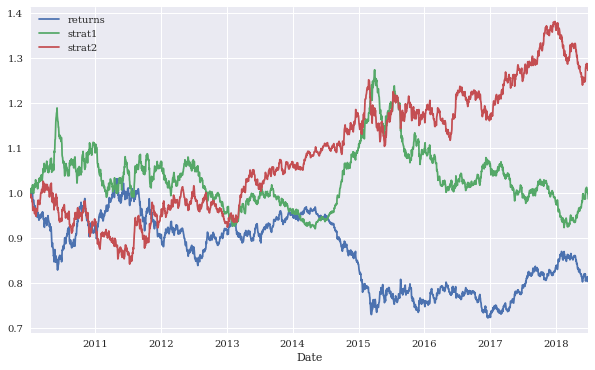

In [42]:
data[['returns','strat1','strat2']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [43]:
from sklearn.cluster import KMeans

In [58]:
model=KMeans(n_clusters=2,random_state=0)

In [59]:
model.fit(data[cols_])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [60]:
data['pos_clus']=model.predict(data[cols_])

In [61]:
data.pos_clus=np.where(data.pos_clus==0,-1,1)

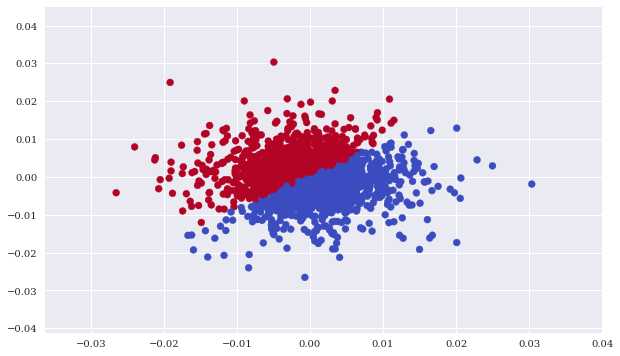

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(data[cols_].iloc[:,0],data[cols_].iloc[:,1],
           c=data['pos_clus'],cmap='coolwarm')

In [63]:
data.head()

,EUR=,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat1,strat2,pos_clus
Date,,,,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,-1,-1,-0.003058,-0.003058,1
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,-1,1,0.006544,-0.006544,-1
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,1,1,0.006544,0.006544,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,-1,-1,-0.006984,-0.006984,-1
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,-1,-1,0.001310,0.001310,-1


In [64]:
data['strat3']=data['pos_clus']*data['returns']

In [65]:
data[['returns','strat3']].sum().apply(np.exp)

returns    0.813126
strat3     1.166746
dtype: float64

In [66]:
(data.direction==data.pos_clus).value_counts()

False    1107
True     1106
dtype: int64

In [16]:
def create_bins(data,bins=[0]):
    global cols_bin
    cols_bin=[]
    for col in cols_:
        col_bin=col+'_bin'
        data[col_bin]=np.digitize(data[col],bins=bins)
        cols_bin.append(col_bin)


In [19]:
a=np.digitize(data.lag_1,bins=[0])

In [26]:
b=np.where(data.lag_1>=0,1,0)

In [27]:
a

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
sum(b-a)

0

In [17]:
create_bins(data)

In [95]:
data[cols_bin+['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-06,0,1,1
2010-01-07,1,0,-1
2010-01-08,0,1,1
2010-01-11,1,0,1
2010-01-12,1,1,-1


In [96]:
grouped=data.groupby(cols_bin+['direction'])

In [97]:
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           237
                       0             4
                       1           276
           1          -1           280
                       0             1
                       1           295
1          0          -1           287
                       0             1
                       1           288
           1          -1           288
                       0             5
                       1           251
dtype: int64

In [100]:
res=grouped['direction'].size().unstack(fill_value=0)

In [101]:
def highlight_max(s):
    is_max=s==s.max()
    return['background-color:yellow' if v else '' for v in is_max]

In [112]:
res.style.apply(highlight_max,axis=1)

In [105]:
klk=res==res.max()

In [109]:
for v in klk:
    print(v)

-1
0
1


In [113]:
cols_bin

['lag_1_bin', 'lag_2_bin']

In [115]:
data['pos_freq']=np.where(data[cols_bin].sum(axis=1)==2,-1,1)

In [116]:
(data['direction']==data['pos_freq']).value_counts()

True     1147
False    1066
dtype: int64

In [18]:
data.head()

,EUR=,returns,direction,lag_1,lag_2,lag_1_bin,lag_2_bin
Date,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,0,1
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,1,0
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,0,1
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,1,0
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,1,1


In [13]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [14]:
C=1

In [15]:
models={'log_reg':linear_model.LogisticRegression(C=C),
       'gauss_nb':GaussianNB(),
       'svm':SVC(C=C)}

In [36]:
def fit_models(data):
    mfit={model:models[model].fit(data[cols_bin],data['direction']) for model in models.keys()}

In [37]:
fit_models(data)

C:\An\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\An\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\An\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
def dposition(data):
    for model in models.keys():
        data['pos_'+model]=models[model].predict(data[cols_bin])

In [39]:
dposition(data)

In [41]:
def evaluate(data):
    global sel
    sel=[]
    for model in models.keys():
        col='strat_'+model
        data[col]=data['pos_'+model]*data['returns']
        sel.append(col)
    sel.insert(0,'returns')


In [42]:
evaluate(data)

In [43]:
data[sel].sum().apply(np.exp)

returns           0.813126
strat_log_reg     1.385460
strat_gauss_nb    1.385460
strat_svm         1.016673
dtype: float64

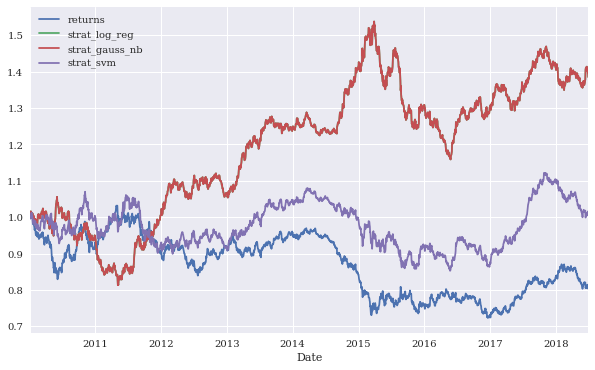

In [44]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [47]:
import numpy as np

from sklearn.model_selection import train_test_split
data.head()

,EUR=,returns,direction,lag_1,lag_2,lag_1_bin,lag_2_bin,pos_log_reg,pos_gauss_nb,pos_svm,strat_log_reg,strat_gauss_nb,strat_svm
Date,,,,,,,,,,,,,
2010-01-06,1.4412,0.003058,1,-0.002988,0.006125,0,1,1,1,1,0.003058,0.003058,0.003058
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988,1,0,-1,-1,1,0.006544,0.006544,-0.006544
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058,0,1,1,1,1,0.006544,0.006544,0.006544
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544,1,0,-1,-1,1,-0.006984,-0.006984,0.006984
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544,1,1,-1,-1,-1,0.001310,0.001310,0.001310


In [70]:
X_train, X_test, y_train, y_test=train_test_split(data[cols_], data['modified'], test_size=0.33, random_state=42)

In [71]:
import lightgbm as lgb

In [72]:
lgb_train=lgb.Dataset(X_train,y_train)
lgb_eval=lgb.Dataset(X_test,y_test,reference=lgb_train)
wholeset=lgb.Dataset(data[cols_],data['direction'])

In [74]:
gbm=lgb.train(params,train_set=lgb_train,num_boost_round=20,
             valid_sets=lgb_eval,early_stopping_rounds=5)

[1]	valid_0's multi_logloss: 0.736644
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 0.736288
[3]	valid_0's multi_logloss: 0.735567
[4]	valid_0's multi_logloss: 0.735325
[5]	valid_0's multi_logloss: 0.734908
[6]	valid_0's multi_logloss: 0.735912
[7]	valid_0's multi_logloss: 0.737144
[8]	valid_0's multi_logloss: 0.737328
[9]	valid_0's multi_logloss: 0.737624
[10]	valid_0's multi_logloss: 0.738365
Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 0.734908


In [73]:
params = {    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss'}
  

In [67]:
data['modified']=data.direction+1

In [78]:
ypred=gbm.predict(data[cols_])

In [84]:
prediction=pd.DataFrame(ypred)

In [89]:
best_preds_svm = [np.argmax(line) for line in ypred]

In [100]:
pd.DataFrame(best_preds_svm)-1
data['lightgbm']=best_preds_svm

In [102]:
data.lightgbm-=1

In [105]:
data['lightgbmstrat']=data.lightgbm*data.returns

In [106]:
data[['lightgbmstrat','returns']].sum().apply(np.exp)

lightgbmstrat    12.359200
returns           0.813126
dtype: float64

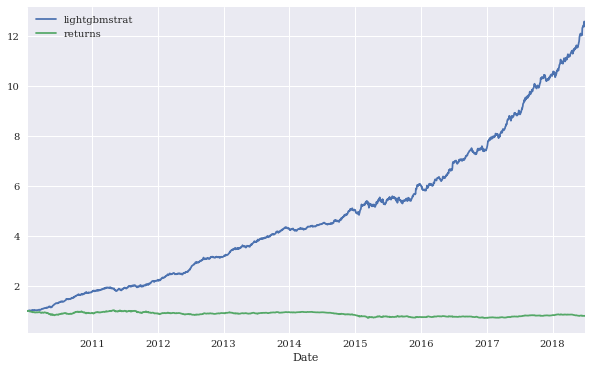

In [108]:
data[['lightgbmstrat','returns']].cumsum().apply(np.exp).plot(figsize=(10,6))